In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


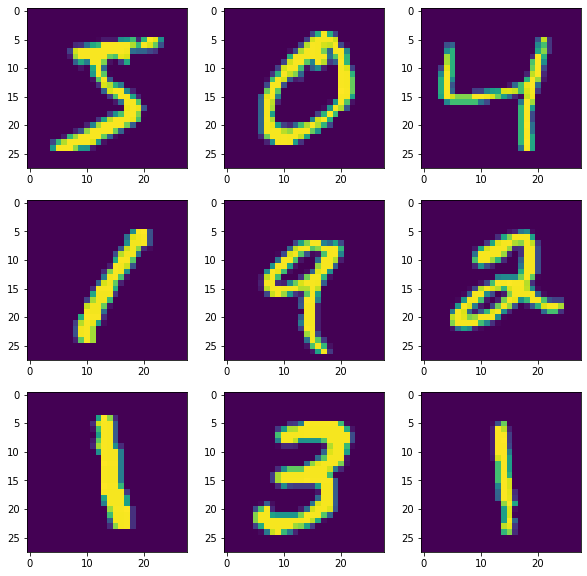

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i].reshape((28,28)))
plt.show()

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, (3, 3),activation='relu', input_shape=(28,28,1),use_bias=False))  #26
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, (3, 3),activation='relu',use_bias=False))  #24
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, (3, 3),activation='relu',use_bias=False))  #22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D((2,2)))                                          #11

model.add(Convolution2D(10, (1, 1),activation='relu',use_bias=False))  #11
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, (3, 3),activation='relu',use_bias=False))  #9
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, (3, 3),activation='relu',use_bias=False))  #7
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, (3, 3),activation='relu',use_bias=False))  #5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, (5, 5), use_bias=False))                    #1

model.add(Flatten())
model.add(Activation('softmax'))

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1152      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 32)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.0035 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1,
          validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.0035.
60000/60000 [==============================] - 6s 98us/step - loss: 0.0965 - acc: 0.9696 - val_loss: 0.0605 - val_acc: 0.9804
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0026535254.
60000/60000 [==============================] - 6s 96us/step - loss: 0.0599 - acc: 0.9813 - val_loss: 0.0478 - val_acc: 0.9839
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0021367521.
60000/60000 [==============================] - 6s 95us/step - loss: 0.0486 - acc: 0.9848 - val_loss: 0.0311 - val_acc: 0.9894
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0017884517.
60000/60000 [==============================] - 6s 95us/step - loss: 0.0405 - acc: 0.9873 - val_loss: 0.0275 - val_acc: 0.9912
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0015377856.
60000/60000 [=========

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.01748533243541024, 0.9949]
